# Data Visualization Tutorial

## Plot #1: Donut Charts

A donut chart is essentially a Pie Chart with an area of the centre cut out.

Pie Charts are sometimes criticised for focusing readers on the proportional areas of the slices to one another and to the chart as a whole. This makes it tricky to see the differences between slices, especially when you try to compare multiple Pie Charts together. A Donut Chart somewhat remedies this problem by de-emphasizing the use of the area. Instead, readers focus more on reading the length of the arcs, rather than comparing the proportions between slices. Also, Donut Charts are more space-efficient than Pie Charts because the blank space inside a Donut Chart can be used to display information inside it.

### Example No. 1: The Data

(...)

***Loading the Data***

In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# the glob module finds all the pathnames matching a specified pattern
import glob

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

We have one file for each year. To get some ideas on how to elegantly read in multiple files in Pandas, check this [link](https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688).

In [2]:
accidents = pd.concat([pd.read_csv(f, compression='zip', 
                                   low_memory=False) for f in glob.glob('data/*Accidents*.zip')])

print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])

accidents.head()

Records: 691641 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [8]:
accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

To know more about the data and what's actually behind the figures, it's worth checking the ...

***Handling Missing Values***

In [4]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 0.063 %


In [5]:
accidents = accidents.dropna()

In [6]:
print('Proportion of Missing Values in Accidents Table AFTER cleaning:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table AFTER cleaning: 0.0 %


***Accident Severity***

We just learned that we have 3 types of accidents: fatal accidents (stored with a `1`), serious accidents (`2`), and slight accidents (`3`). Let's quickly check how many of each we face here:

In [9]:
accidents.Accident_Severity.value_counts()

3    543467
2     97251
1      7437
Name: Accident_Severity, dtype: int64

### Example 1: The Chart

***Without an "Explosion"***

We first use the output of `.value_counts()` to assign our data:

In [17]:
fatal   = accidents.Accident_Severity.value_counts()[1]
serious = accidents.Accident_Severity.value_counts()[2]
slight  = accidents.Accident_Severity.value_counts()[3]

Next, we need to define the labels' names and the labels' sizes with the variables we just created:

In [18]:
names = ['Fatal Accidents', 'Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]

We create the pie chart with `plt.pie()` specifying several keywords:
- `x`: The size of the categories.
- `labels`: The names of the categories.
- `colors`: The colors of the categories.
- `autopct`: A string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`. 
- `pctdistance`: The ratio between the center of each pie slice and the start of the text.
- `textprops`: Dict of arguments to pass to the text objects.
- `wedgeprops`: Dict of arguments passed to the wedge objects making the pie.

Then we need to create a circle for the center of the plot with `plt.Circle()` to make the pie look like a donut - and finally put the figure together:

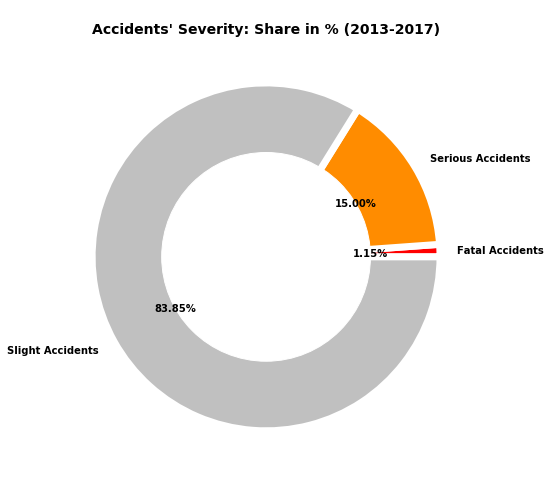

In [19]:
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops={'fontweight':'bold'},
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

circle = plt.Circle((0,0), 0.6, color='white')

fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(circle)

plt.title('\nAccidents\' Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

***With an "Explosion"***

The `explode` keyword is a len(x) array which specifies the fraction of the radius with which to offset each wedge. Try different values yourself to experience the differences:

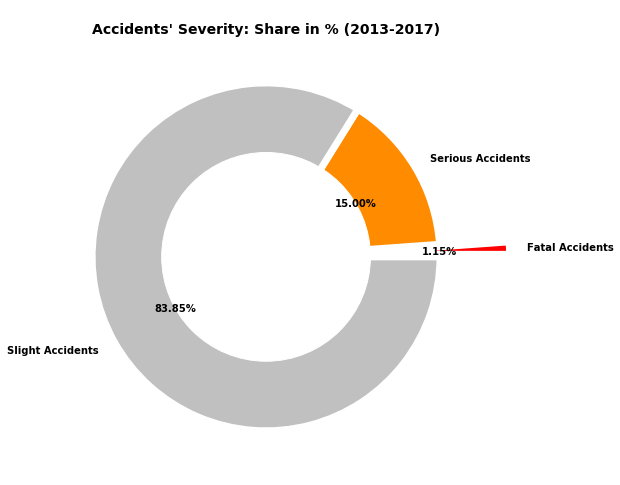

In [22]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()[1]
serious = accidents.Accident_Severity.value_counts()[2]
slight  = accidents.Accident_Severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]

# create a pie chart
explode = (0.4, 0, 0)

plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'}, explode=explode)

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccidents\' Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

### Example 2: The Data

### Example 2: The Plot